<center>  <h1> Formation d'une image par une lentille mince </h1> </center>




![](http://www.pcsi2.net/fabert/wp-content/uploads/physique/Formation-dune-image-par-une-lentille-mince.pdf)

[Pdf complet](http://www.pcsi2.net/fabert/wp-content/uploads/physique/Formation-dune-image-par-une-lentille-mince.pdf)

## Mesure unique, détermination de $f'$ avec incertitude de type B

In [2]:
#Chargement des bibliothèques
import numpy as np
import matplotlib.pyplot as plt

#Mesures effectuées et incertitudes type
d0 = 17.3
ud0 = 0.2
d1m = 63.7
ud1 = 0.2
d2m = 195
ud2 = 0.2


In [6]:

#Utilisation de la methode de Monte Carlo, incertitude type B
N=10_000
d0=d0+ud0*np.random.uniform(-1,1,N) # si distribution rectangulaire
d1=d1m+ud1*np.random.randn(N)       # si distribution normale
d2= d2m+ud2*np.random.randn(N)      # si distribution normale

In [7]:

f_p=(d0-d1)*(d2-d1)/((d0-d1)-(d2-d1)) # calcul de f'
print("Meilleur estimateur : f'=",f_p.mean()," cm") # valeur moyenne
print("Ecart type : u(f')=",f_p.std(ddof=1)," cm")  # écart type, l'incertitude type
print("Soit f'=",round(f_p.mean(),2)," +- ",round(f_p.std(ddof=1),2)," cm.")


Meilleur estimateur : f'= 34.282547217034825  cm
Ecart type : u(f')= 0.1158290724803077  cm
Soit f'= 34.28  +-  0.12  cm.


In [8]:

#Comparaison a la valeur attendue
f_th=100/3 #valeur attendue en cm
u_fth=1 #cm son incertitude type

En=abs(f_th-f_p.mean())/np.sqrt(f_p.std()**2+u_fth**2)
print("Ecart normalisé : ",En)

if En<2:
  print("Les mesures sont cohérentes")
else:
  print("Les mesures ne sont pas cohérentes")

Ecart normalisé :  0.942910367182346
Les mesures sont cohérentes


## Mesures multiples, validation de la relation de Descartes et détermination de $f'$ avec incertitude de type A


In [3]:
#Valeurs mesurées

d0=17.3
d1=np.array([63.7,148,64.3,142.3,65.2,137.4,66.2,130.2,67.6,123.9,69.2,117.4,71.6,109.9,75.3,102.0,87.3],dtype=float)
d2=np.array([195,195,190,190,185,185,180,180,175,175,170,170,165,165,160,160,155],dtype=float)

if len(d1)!=len(d2):
    print("Il manque des valeurs dans d1 ou d2 !" )


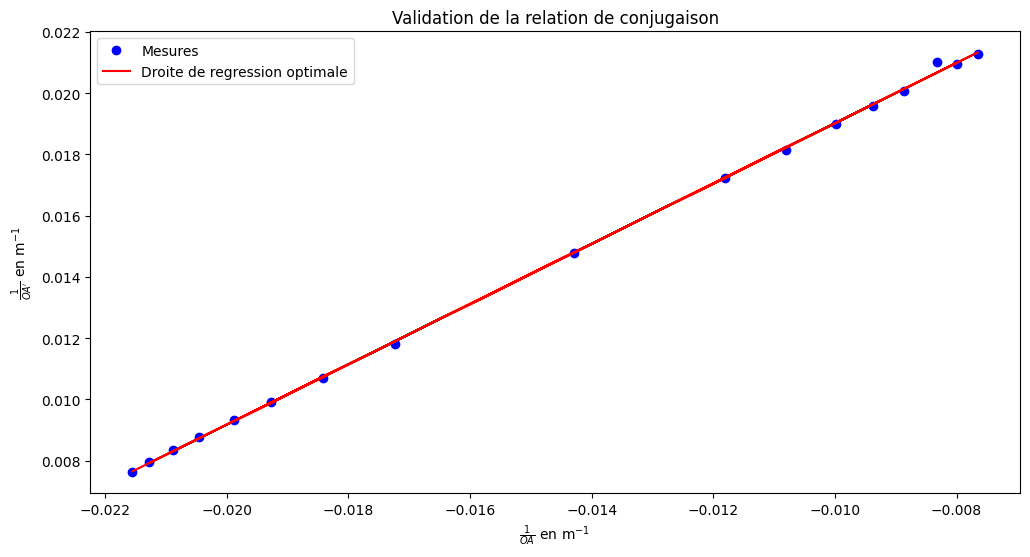

In [4]:

invOAp=1/(d2-d1) #calcul de 1/OA' et 1/OA
invOA=1/(d0-d1) # attention au signe !

#Controle visuel
plt.figure(figsize=(12,6))
plt.title('Validation de la relation de conjugaison')
plt.plot(invOA,invOAp,'bo',label='Mesures')
plt.xlabel("$\\frac{1}{OA}$ en m$^{-1}$")
plt.ylabel("$\\frac{1}{OA'}$ en m$^{-1}$")

#Determination des coefficients a et b de la droite de régression optimale
a,b=np.polyfit(invOA,invOAp,1)
plt.plot(invOA,a*invOA+b,'r',label='Droite de regression optimale')
plt.legend(loc='best')


In [5]:

f_p=(d0-d1)*(d2-d1)/((d0-d1)-(d2-d1)) # calcul de f'
print("Meilleur estimateur : f'=",f_p.mean()," cm") # valeur moyenne
print("Ecart type : u(f')=",0.2," cm")  # ecart type, l'incertitude type
print("Soit f'=",round(f_p.mean(),2)," +- ",round(f_p.std(ddof=1),2)," cm.")


Meilleur estimateur : f'= 34.373174352748855  cm
Ecart type : u(f')= 0.2  cm
Soit f'= 34.37  +-  0.15  cm.


In [6]:

#Comparaison a la valeur attendue
f_th=100/3 # valeur attendue en cm
u_fth=1 #cm son incertitude type

En=abs(f_th-f_p.mean())/np.sqrt(f_p.std()**2+u_fth**2)

print(En)

if En<2:
  print("Les mesures sont cohérentes")
else:
  print("Les mesures ne sont pas cohérentes")

1.028757066341221
Les mesures sont cohérentes
